In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

nome = ["Paula","Ana","Denise","Arthur","Maria","Thiago","Alan","Catarina","Marcos","José"]
turno =["Primeiro","Segundo","Primeiro","Segundo","Primeiro","Segundo","Primeiro","Primeiro","Segundo","Primeiro"]
dataframe = pd.DataFrame({"Nome":nome,"Turno":turno})

In [ ]:
turno = pd.get_dummies(dataframe[["Turno"]])
turno.head()

,Turno_Primeiro,Turno_Segundo
0,True,False
1,False,True
2,True,False
3,False,True
4,True,False


## Codificação de variáveis categóricas por contagem ou frequência de observação

In [1]:
import pandas as pd

nome = ["Paula","Ana","Denise","Arthur","Maria","Thiago","Alan","Catarina","Marcos","José"]
turno =["Primeiro","Segundo","Primeiro","Segundo","Primeiro","Segundo","Primeiro","Primeiro","Segundo","Primeiro"]
cidade = ["Curitiba","Curitiba","Cascavel","Cascavel","Maringá","Indaiatuba","Cascavel","Cascavel","Curitiba","Ponta Grossa"]

dataframe= pd.DataFrame({"Nome":nome,"Turno":turno,"Cidade":cidade})

In [2]:
contagem_cidade = dataframe["Cidade"].value_counts().to_dict()

In [4]:
contagem_cidade

{'Cascavel': 4,
 'Curitiba': 3,
 'Maringá': 1,
 'Indaiatuba': 1,
 'Ponta Grossa': 1}

In [6]:
contagem_cidade = dict(dataframe["Cidade"].value_counts())

print(contagem_cidade)

{'Cascavel': 4, 'Curitiba': 3, 'Maringá': 1, 'Indaiatuba': 1, 'Ponta Grossa': 1}


In [7]:
dataframe["cidade"] = dataframe["Cidade"].map(contagem_cidade)

In [8]:
def codificacao_contagem(dataframe,coluna,dicionario):
     dataframe[coluna] = dataframe[coluna].map(dicionario)
     return dataframe

In [9]:
def codificacao_frequencia(dataframe,coluna):
    aux = (dataframe[coluna].value_counts()/len(dataframe[coluna])).to_dict()
    coluna_aux = round(dataframe[coluna].map(aux),2)

    return coluna_aux

In [10]:
dataframe["Cidade"] = codificacao_frequencia(dataframe,"Cidade")

In [11]:
dataframe.head()

,Nome,Turno,Cidade,cidade
0,Paula,Primeiro,0.3,3
1,Ana,Segundo,0.3,3
2,Denise,Primeiro,0.4,4
3,Arthur,Segundo,0.4,4
4,Maria,Primeiro,0.1,1


## Codificação com números inteiros de maneira ordenada

In [12]:
nome = ["Paula","Ana","Denise","Arthur","Maria","Thiago","Alan","Catarina","Marcos","José"]
turno =["Primeiro","Segundo","Primeiro","Segundo","Primeiro","Segundo","Primeiro","Primeiro","Segundo","Primeiro"]
cidade = ["Curitiba","Curitiba","Cascavel","Maringá","Indaiatuba","Cascavel","Cascavel","Curitiba","Ponta Grossa","Curitiba"]
idade =[18,18,17,19,21,22,23,25,18,17]

dataframe= pd.DataFrame({"Nome":nome,"Turno":turno,"Cidade":cidade,"Idade":idade})

In [15]:
def grafico(dataframe,coluna1,coluna2):
  plt.figure(figsize=(12,7))
  dataframe.groupby(coluna1)[coluna2].mean().plot()
  texto = f"Relação entre a {coluna1} e a média da {coluna2}"
  plt.title(texto)
  plt.ylabel(coluna2)

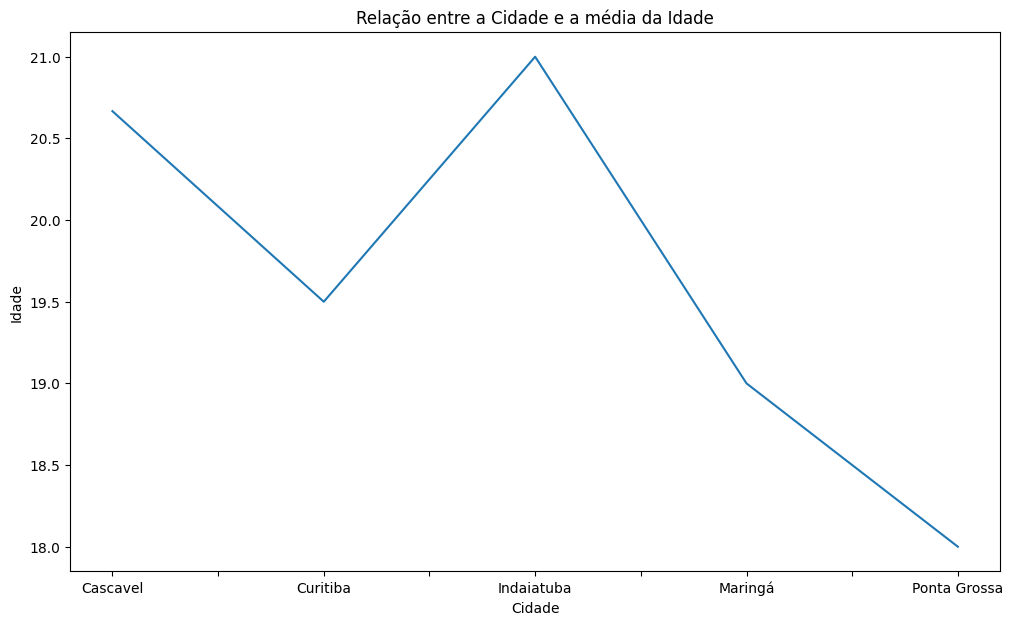

In [16]:
grafico(dataframe,"Cidade","Idade")

In [17]:
rotulos_ordenados = dataframe.groupby(["Cidade"])["Idade"].mean().sort_values().index

In [18]:
rotulos_ordenados

Index(['Ponta Grossa', 'Maringá', 'Curitiba', 'Cascavel', 'Indaiatuba'], dtype='object', name='Cidade')

In [19]:
ordinal = {k:i for i, k in enumerate(rotulos_ordenados,0)}

In [20]:
ordinal

{'Ponta Grossa': 0,
 'Maringá': 1,
 'Curitiba': 2,
 'Cascavel': 3,
 'Indaiatuba': 4}

In [22]:
dataframe["Cidade"] = dataframe["Cidade"].map(ordinal)

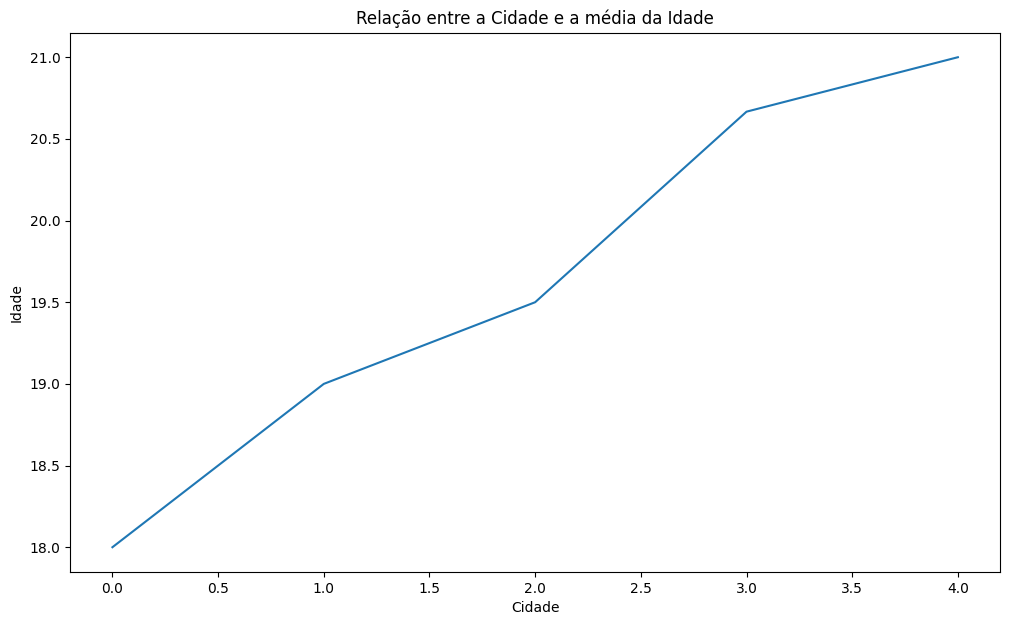

In [23]:
grafico(dataframe,"Cidade","Idade")